<a href="https://colab.research.google.com/github/kimgoinghard/data-structure/blob/main/study_torch_9_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression 
- 둘 중 하나를 결정하는 이진분류문제에서 사용하는 대표적인 알고리즘!

Simple Lnear Regression에서의 직선과는 다르게 이진 분류에서는 직선을 사용하게 된다면 작동이 어렵다. 따라서 S자 모양의 그래프가 필요한데, 우리는 아래에 있는 **시그모이드** 함수를 사용한다. 

H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#sigmoid 함수 정의하기
def sigmoid(x):
  return 1 / (1+np.exp(-x))

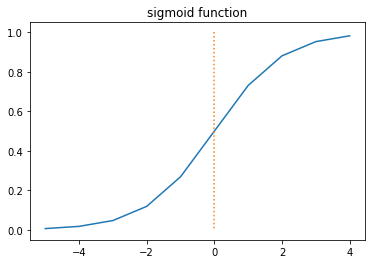

In [ ]:
x = np.arange(-5. , 5., 1. )
y = sigmoid(x)
plt.plot(x, y)
plt.plot([0,0], [1,0], ':')
plt.title('sigmoid function')
plt.show()

위의 시그모이드 함수는 출력값이 0과 1사이의 값으로 조정한다. x가 매우 작을 땐 0으로, 클 때는 1로 수렴한다. 

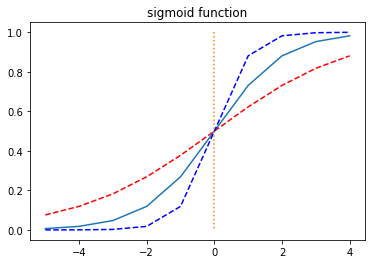

In [ ]:
#w값에 따른 시그모이드 함수의 변화
w = np.arange(-5, 5, 1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)
plt.plot(x, y1, 'r', linestyle = '--')  #0.5w
plt.plot(x, y2) # w
plt.plot(x, y3, 'b', linestyle = '--') #2w
plt.plot([0,0], [1,0], ':')
plt.title('sigmoid function') 

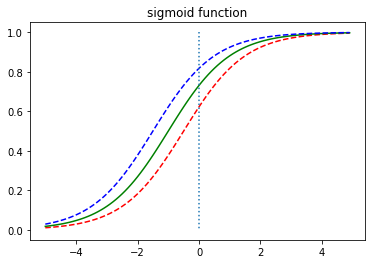

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') 
plt.title('sigmoid function')
plt.show()

시그모이드 함수의 출력값이 0에서 1사이라는 특성을 가지고 0.5를 기준으로 0.5.이상이면 True, 이하이면 False 라고 판단하도록 할 수 있다.

이제 비용함수를 정해보면, 선형회귀에서 사용했던 MSE를 그대로 사용한다면 아래 그래프와 같이 cost-function의 미분이 non-convex함수가 되어 gradient descent를 사용하기 어려워진다. 따라서 새로운 비용함수를 정의한다.

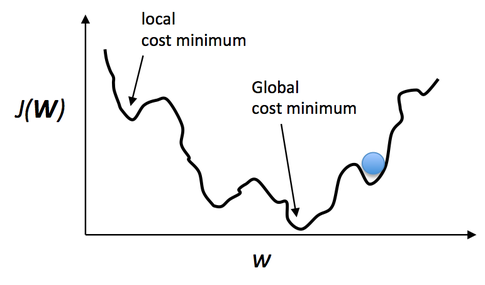

시그모이드는 0과 1사이의 출력값을 가진다. 따라서 실제값이 1이었다면 예측값이 0에 가까울 수록 오차가 커지고, 실제값이 0이었다면 예측값이 1에 가까울수록 오차가 커진다. 
그리고 이를 만족시키는 함수가 y = 0.5에 대칭되는 두 개의 로그 함수이고 한 개의 식으로 정리하면 아래와 같다.

cost( H(x), y) = -[ylogH(x) + (1-y)log(1-H(x))]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros((1), requires_grad = True)
# y = sigmoid(w+b) 

In [ ]:
y_hat =1/ (1+ torch.exp(x_train.matmul(W) + b))

In [ ]:
print(y_hat) #W가 모두 0으로 초기화 되어있기 때문에 

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [ ]:
# -(y_train*torch.log(y_hat)  + (1-y_train)*torch.log(1-y_hat))
# cost function

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)

In [ ]:
losses = -(y_train * torch.log(y_hat) + 
           (1 - y_train) * torch.log(1 - y_hat))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [ ]:
cost = losses.mean()
print(cost)
# 전체 오차의 평균이 cost function

tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
F.binary_cross_entropy(y_hat, y_train) #torch에서 제공하는 cost function 메소드

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr = 1)

epochs = 1000
for epoch in range(epochs + 1):
  y_hat = torch.sigmoid(x_train.matmul(W) + b) 
  #cost = F.binary_cross_entropy(y_hat, y_train)

  cost = -(y_train * torch.log(y_hat) + 
             (1 - y_train) * torch.log(1 - y_hat)).mean()

  optimizer.zero_grad() #optimizer 0으로 초기화
  cost.backward() #cost function 미분으로 매개변수 계산
  optimizer.step() #매개변수 갱신

  if epoch % 100 == 0:
    print('Epoch : {0} / {1}, Cost : {2:.5f}  '.format(epoch, epochs, cost.item()))

Epoch : 0 / 1000, Cost : 0.69315  
Epoch : 100 / 1000, Cost : 0.13472  
Epoch : 200 / 1000, Cost : 0.08064  
Epoch : 300 / 1000, Cost : 0.05790  
Epoch : 400 / 1000, Cost : 0.04530  
Epoch : 500 / 1000, Cost : 0.03726  
Epoch : 600 / 1000, Cost : 0.03167  
Epoch : 700 / 1000, Cost : 0.02756  
Epoch : 800 / 1000, Cost : 0.02439  
Epoch : 900 / 1000, Cost : 0.02189  
Epoch : 1000 / 1000, Cost : 0.01985  


In [ ]:
y_hat = torch.sigmoid(x_train.matmul(W) + b)
print(y_hat)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [ ]:
prediction = y_hat >= torch.FloatTensor([0.5])
# 출력값이 0.5이상이면 True, 이하면 False를 출력하여 이진 분류를 수행하는 부분
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [ ]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
model  = nn.Sequential(
                      nn.Linear(2,1), #input_dim = 2, output_dim =1 
                      nn.Sigmoid()
                      )
# nn모듈의 Sequential()은 nn모듈의 층들을 여러개 쌓을 수 있도록 한다. 
# 지금은 로지스틱 회귀를 진행하므로, Linear층에 시그모이드 층을 연결했다.

In [ ]:
model(x_train)

tensor([[0.4147],
        [0.4105],
        [0.6101],
        [0.5386],
        [0.6018],
        [0.7205]], grad_fn=<SigmoidBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 1)
epochs = 1000
for epoch in range(epochs + 1):
  y_hat = model(x_train)

  cost = F.binary_cross_entropy(y_hat, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
      prediction = y_hat>= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
      correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
      accuracy = correct_prediction.sum().item()/ len(correct_prediction) # 정확도를 계산
      print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, epochs, cost.item(), accuracy * 100))
      


Epoch    0/1000 Cost: 0.010291 Accuracy 100.00%
Epoch   10/1000 Cost: 0.010242 Accuracy 100.00%
Epoch   20/1000 Cost: 0.010194 Accuracy 100.00%
Epoch   30/1000 Cost: 0.010145 Accuracy 100.00%
Epoch   40/1000 Cost: 0.010098 Accuracy 100.00%
Epoch   50/1000 Cost: 0.010050 Accuracy 100.00%
Epoch   60/1000 Cost: 0.010004 Accuracy 100.00%
Epoch   70/1000 Cost: 0.009957 Accuracy 100.00%
Epoch   80/1000 Cost: 0.009911 Accuracy 100.00%
Epoch   90/1000 Cost: 0.009866 Accuracy 100.00%
Epoch  100/1000 Cost: 0.009821 Accuracy 100.00%
Epoch  110/1000 Cost: 0.009776 Accuracy 100.00%
Epoch  120/1000 Cost: 0.009732 Accuracy 100.00%
Epoch  130/1000 Cost: 0.009688 Accuracy 100.00%
Epoch  140/1000 Cost: 0.009644 Accuracy 100.00%
Epoch  150/1000 Cost: 0.009601 Accuracy 100.00%
Epoch  160/1000 Cost: 0.009558 Accuracy 100.00%
Epoch  170/1000 Cost: 0.009516 Accuracy 100.00%
Epoch  180/1000 Cost: 0.009474 Accuracy 100.00%
Epoch  190/1000 Cost: 0.009432 Accuracy 100.00%
Epoch  200/1000 Cost: 0.009391 Accuracy 

In [ ]:
model(x_train)

tensor([[2.0463e-05],
        [1.1471e-02],
        [1.3600e-02],
        [9.8390e-01],
        [9.9977e-01],
        [9.9998e-01]], grad_fn=<SigmoidBackward0>)

In [ ]:
print(list(model.parameters())) #W, b

[Parameter containing:
tensor([[4.2844, 2.0560]], requires_grad=True), Parameter containing:
tensor([-19.1933], requires_grad=True)]


사실 위와 같은 로지스틱 회귀는 인공신경망으로 생각할 수 있다. 각 입력에 가중치가 곱해지고 그것들에 편향을 더해 출력이 되는 구조가 인공신경망이다. 
따라서 인공신경망은 다중 로지스틱 회귀와 유사하다.

로지스틱 회귀를 클래스로 구현해본다.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [23]:
x_data = [[1,2], [2,3],[3,1],[4,3],[5,3],[6,2]]
y_data=[[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [24]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self, x):
    return self.sigmoid(self.linear(x))


In [31]:
model = BinaryClassifier() #BinaryClassifier 객체 생성

In [32]:
optimizer = optim.SGD(model.parameters(), lr = 1)
n_epoch = 1000
for epoch in range(n_epoch+1):
  y_hat  = model(x_train)
  cost = F.binary_cross_entropy(y_hat, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 20 == 0 :
    prediction = y_hat >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train #prediction은 boolean이므로 float로 바꿔준 뒤 y_train과 같은 값만 correct_prediction에 저장한다.
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # .item() : 원소를 추출함. 
    print('Epoch : {0} / {1}, Cost : {2}, Accuracy : {3:5f}%'.format(epoch, n_epoch,cost.item() ,accuracy*100))

Epoch : 0 / 1000, Cost : 0.7789469361305237, Accuracy : 33.333333%
Epoch : 20 / 1000, Cost : 0.44654831290245056, Accuracy : 66.666667%
Epoch : 40 / 1000, Cost : 0.31894543766975403, Accuracy : 83.333333%
Epoch : 60 / 1000, Cost : 0.22259362041950226, Accuracy : 100.000000%
Epoch : 80 / 1000, Cost : 0.15815991163253784, Accuracy : 100.000000%
Epoch : 100 / 1000, Cost : 0.13471552729606628, Accuracy : 100.000000%
Epoch : 120 / 1000, Cost : 0.11863978952169418, Accuracy : 100.000000%
Epoch : 140 / 1000, Cost : 0.10605091601610184, Accuracy : 100.000000%
Epoch : 160 / 1000, Cost : 0.09592542052268982, Accuracy : 100.000000%
Epoch : 180 / 1000, Cost : 0.0876035988330841, Accuracy : 100.000000%
Epoch : 200 / 1000, Cost : 0.08064096421003342, Accuracy : 100.000000%
Epoch : 220 / 1000, Cost : 0.07472769916057587, Accuracy : 100.000000%
Epoch : 240 / 1000, Cost : 0.0696413442492485, Accuracy : 100.000000%
Epoch : 260 / 1000, Cost : 0.06521832197904587, Accuracy : 100.000000%
Epoch : 280 / 1000

In [29]:
correct_prediction.sum().item()

6